# GRIP@ The Spark Foundation

# Author : NASIR KHAN

# Task 2 : Prediction using Decision Tree Algorithm

**In this Iris data it consists a three types of flower namely 'Iris-Setosa','Iris-Versicolor' and 'Iris-Virginica'.**

**Main Highlights of this task:**

1. Create the Decision Tree classifier and visualize it graphically.

2. If we feed any new data to this classifier, it would be able to
predict the right class accordingly.


**Decision Tree Algorithm**

Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).


# STEP 1 : DATA  IMPORTING

We use pandas.read_csv() function to read the csv file. In the bracket, we put the file path along with a quotation mark, so that pandas will read the file into a data frame from that address. The file path can be either an URL or your local file address.

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn import tree
from IPython.display import Image
import pydotplus

In [2]:
#Reading the data

df=pd.read_csv("Iris_data.csv")
print("Now, We have successfully read the raw dataset")
df

Now, We have successfully read the raw dataset


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Get the number of rows and columns:
df.shape

(150, 6)



**Data has a variety of types.The main types stored in Pandas dataframes are object, float, int, bool and datetime64. In order to better learn about each attribute, it is always good for us to know the data type of each column. In Pandas:**

In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
#Print out the unique values in the column "Species".

df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)



**The value_counts() method returns a Series containing the counts of unique values. This means, for any column in a dataframe, this method returns the count of unique entries in that column.**

In [6]:
df["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64



**If we would like to get a statistical summary of each column, such as count, column mean value, column standard deviation, etc. We use the describe method:**

**This method will provide various summary statistics, excluding NaN (Not a Number) values.**

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000





**This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.**


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB




**notnull() function detects non-missing values in the dataframe. All of the non-missing values gets mapped to "True" and missing values get mapped to "False".**



In [9]:
df.notnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
145,True,True,True,True,True,True
146,True,True,True,True,True,True
147,True,True,True,True,True,True
148,True,True,True,True,True,True


In [10]:
#Drop the 'Id' feature in column
df.drop('Id',inplace=True,axis=1)

In [11]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# STEP 2 :  DATA VISUALIZATION

<AxesSubplot:ylabel='Species'>

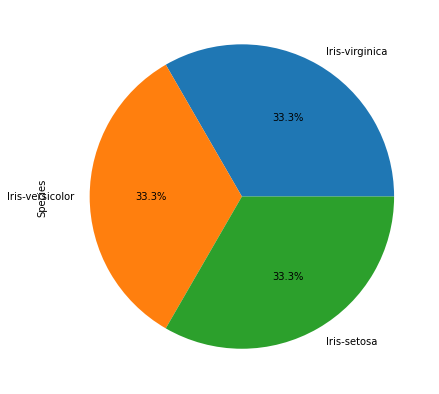

In [12]:
df.Species.value_counts().plot(kind='pie',autopct='%.1f%%',figsize=(7,7))


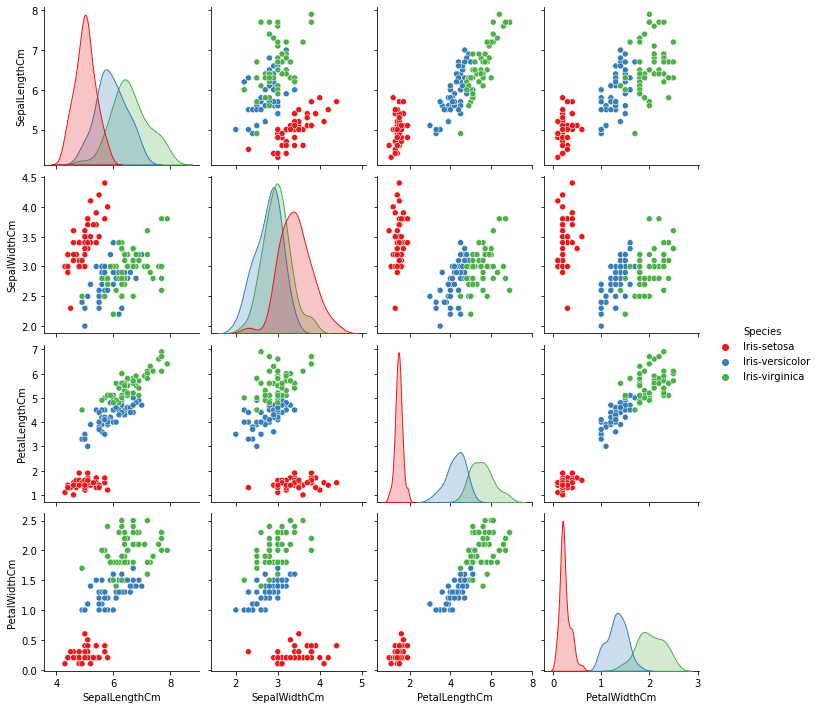

In [13]:
sns.pairplot(df,hue="Species",palette="Set1")

<AxesSubplot:>

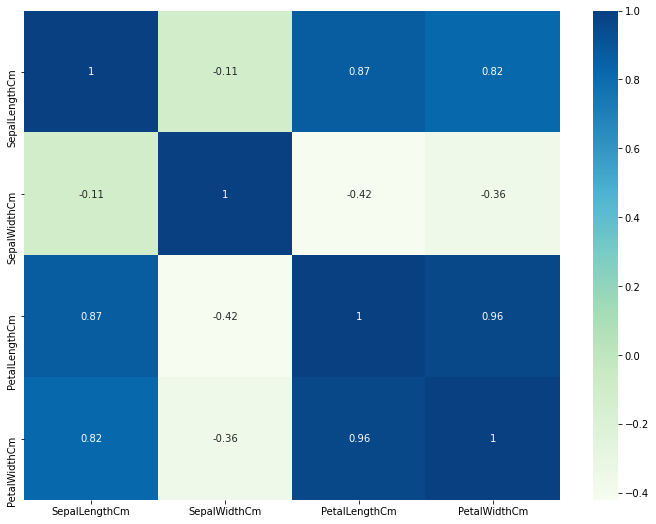

In [14]:
plt.rcParams['figure.figsize']=[12,9]
sns.heatmap(df.corr(),annot=True,cmap="GnBu")

# Training Model

In [15]:
#Dividing the data into dependent and independent variable

X=df.drop("Species",axis=1)
y=df["Species"]


In [16]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [27]:
#Splitting the data into training and testing set.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

#Decision Tree
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Training Complete")

Training Complete


In [28]:
#Prediction

print(X_test)
y_pred=dtree.predict(X_test)
y_pred

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
87             6.3           2.3            4.4           1.3
111            6.4           2.7            5.3           1.9
10             5.4           3.7            1.5           0.2
91             6.1           3.0            4.6           1.4
49             5.0           3.3            1.4           0.2
60             5.0           2.0            3.5           1.0
72             6.3           2.5            4.9           1.5
67             5.8           2.7            4.1           1.0
39             5.1           3.4            1.5           0.2
55             5.7           2.8            4.5           1.3
66             5.6           3.0            4.5           1.5
142            5.8           2.7            5.1           1.9
53             5.5           2.3            4.0           1.3
1              4.9           3.0            1.4           0.2
19             5.1           3.8            1.5           0.3
112     

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [29]:
#Confusing Matrix

print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]


In [30]:
#Classification Report

print("Classification Report : ")
print(classification_report(y_test,y_pred))

Classification Report : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [31]:
#Finding Accuracy Score

accuracy_score(y_test,y_pred)

0.9666666666666667

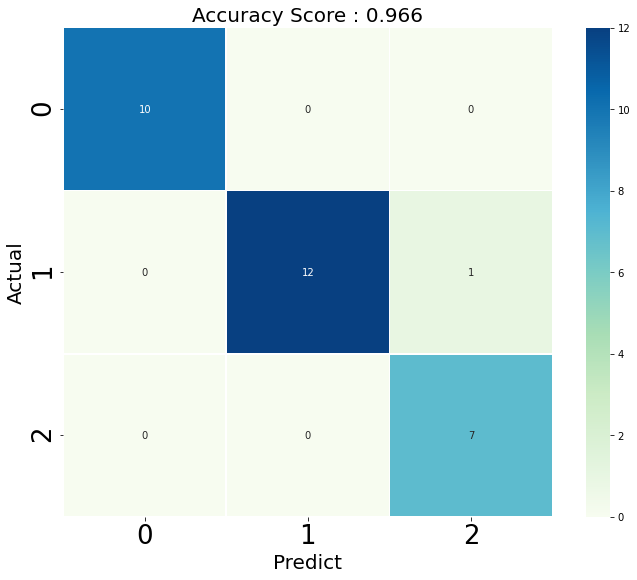

In [32]:
#Visualize Heatmap
accuracy_score(y_test,y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt=".0f",linewidth=0.7,square=True,cmap="GnBu")
plt.title("Accuracy Score : 0.966", fontsize=20)
plt.xlabel("Predict",fontsize=20)
plt.ylabel("Actual",fontsize=20)
plt.tick_params(labelsize=26)
plt.show()

**Visualizing Decision Tree**

In [33]:
text_representaion=tree.export_text(dtree)
print(text_representaion)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: Iris-virginica
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_1 <= 2.65
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  2.65
|   |   |   |   |--- feature_2 <= 5.05
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_2 >  5.05
|   |   |   |   |   |--- feature_1 <= 2.75
|   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |--- feature_1 >  2.75
|   |   |   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_0 <= 5.95
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_0 >  5.95
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_2 >  4.8

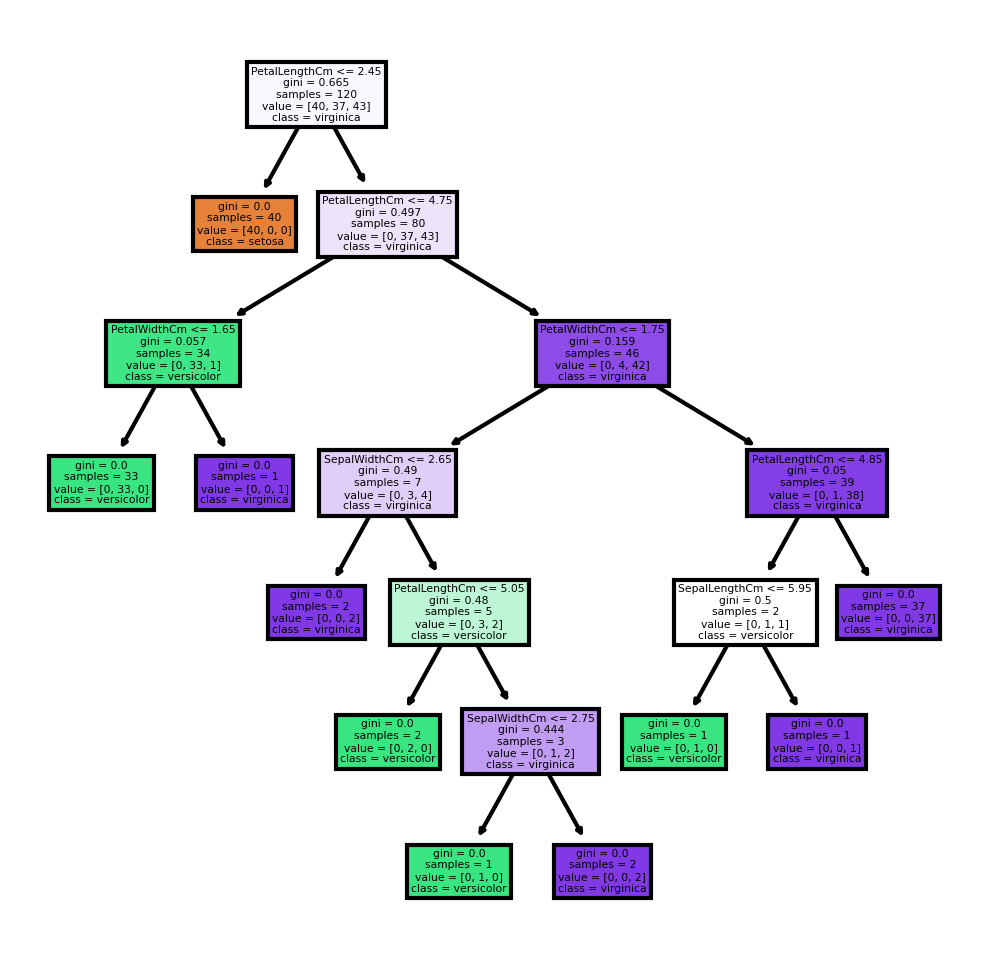

In [34]:

fn=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

# User Input Prediction

In [42]:

feed_data=[float(num) for num in (input("Enter The Data In Order :Sepal.Length  Sepal.Width  Petal.Length  Petal.Width\t:").strip().split())]
predictions = dtree.predict([feed_data])
print(predictions)

Enter The Data In Order :Sepal.Length  Sepal.Width  Petal.Length  Petal.Width	:5.5 5.5 5.5 5.5
['Iris-virginica']


# THE END